In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the API key
from config import weather_api_key

In [4]:
# Import the requests library
import requests

In [5]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

600

In [8]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | leh
Processing Record 2 of Set 1 | finschhafen
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | shitkino
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | mazagao
Processing Record 13 of Set 1 | sao filipe
Processing Record 14 of Set 1 | north platte
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | mogocha
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | port-cartier
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | bargal
City not found. Skipping...
Processing Record 22 of Set 1 | saskylakh
Processing

Processing Record 38 of Set 4 | samusu
City not found. Skipping...
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | a
City not found. Skipping...
Processing Record 41 of Set 4 | andra
Processing Record 42 of Set 4 | santa isabel do rio negro
Processing Record 43 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 44 of Set 4 | dauphin
Processing Record 45 of Set 4 | mkushi
Processing Record 46 of Set 4 | temiscaming
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | canutama
Processing Record 49 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 50 of Set 4 | gadung
Processing Record 1 of Set 5 | henties bay
Processing Record 2 of Set 5 | poum
Processing Record 3 of Set 5 | angra
City not found. Skipping...
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | camp verde
Processing Record 6 of Set 5 | yatou
Processing Record 7 of Set 5 | manoel urbano
Processing Record 8 of Set 5 | p

Processing Record 26 of Set 8 | sukhumi
Processing Record 27 of Set 8 | asau
Processing Record 28 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 29 of Set 8 | jacqueville
Processing Record 30 of Set 8 | saint cloud
Processing Record 31 of Set 8 | bantou
Processing Record 32 of Set 8 | san quintin
Processing Record 33 of Set 8 | pafos
Processing Record 34 of Set 8 | yulara
Processing Record 35 of Set 8 | abrau-dyurso
Processing Record 36 of Set 8 | ransang
Processing Record 37 of Set 8 | alice springs
Processing Record 38 of Set 8 | maarianhamina
Processing Record 39 of Set 8 | sar-e pul
Processing Record 40 of Set 8 | santa catarina de tepehuanes
Processing Record 41 of Set 8 | bilma
Processing Record 42 of Set 8 | kasulu
Processing Record 43 of Set 8 | saint-junien
Processing Record 44 of Set 8 | umm bab
Processing Record 45 of Set 8 | okhotsk
Processing Record 46 of Set 8 | lazaro cardenas
Processing Record 47 of Set 8 | ostrovnoy
Processing Record 48 of Set 8

Processing Record 16 of Set 12 | fergus falls
Processing Record 17 of Set 12 | kitimat
Processing Record 18 of Set 12 | grand centre
City not found. Skipping...
Processing Record 19 of Set 12 | anshun
Processing Record 20 of Set 12 | rocha
Processing Record 21 of Set 12 | kieta
Processing Record 22 of Set 12 | puerto carreno
Processing Record 23 of Set 12 | nikolayevsk-na-amure
Processing Record 24 of Set 12 | ruteng
Processing Record 25 of Set 12 | muros
Processing Record 26 of Set 12 | nuuk
Processing Record 27 of Set 12 | huilong
Processing Record 28 of Set 12 | santa maria do suacui
Processing Record 29 of Set 12 | bridgton
Processing Record 30 of Set 12 | torit
Processing Record 31 of Set 12 | rosarito
Processing Record 32 of Set 12 | myitkyina
Processing Record 33 of Set 12 | wasco
Processing Record 34 of Set 12 | kaitangata
Processing Record 35 of Set 12 | yaan
Processing Record 36 of Set 12 | colonia
Processing Record 37 of Set 12 | nisia floresta
Processing Record 38 of Set 12

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leh,34.1667,77.5833,27.12,46,0,5.37,IN,2022-04-01 17:31:48
1,Finschhafen,-6.6024,147.8681,77.00,90,100,12.75,PG,2022-04-01 17:31:50
2,Albany,42.6001,-73.9662,46.02,81,98,3.00,US,2022-04-01 17:31:52
3,Tuatapere,-46.1333,167.6833,44.82,90,6,3.85,NZ,2022-04-01 17:31:53
4,Shitkino,56.3703,98.3543,37.13,86,99,10.63,RU,2022-04-01 17:31:54
5,Rikitea,-23.1203,-134.9692,76.12,57,80,16.08,PF,2022-04-01 17:31:55
6,Esperance,-33.8667,121.9000,62.44,71,5,15.41,AU,2022-04-01 17:31:56
7,Cape Town,-33.9258,18.4232,66.11,78,20,23.02,ZA,2022-04-01 17:31:57
8,Mar Del Plata,-38.0023,-57.5575,68.02,48,0,10.36,AR,2022-04-01 17:27:02
9,Atuona,-9.8000,-139.0333,78.21,73,41,5.66,PF,2022-04-01 17:31:59


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leh,IN,2022-04-01 17:31:48,34.1667,77.5833,27.12,46,0,5.37
1,Finschhafen,PG,2022-04-01 17:31:50,-6.6024,147.8681,77.00,90,100,12.75
2,Albany,US,2022-04-01 17:31:52,42.6001,-73.9662,46.02,81,98,3.00
3,Tuatapere,NZ,2022-04-01 17:31:53,-46.1333,167.6833,44.82,90,6,3.85
4,Shitkino,RU,2022-04-01 17:31:54,56.3703,98.3543,37.13,86,99,10.63
5,Rikitea,PF,2022-04-01 17:31:55,-23.1203,-134.9692,76.12,57,80,16.08
6,Esperance,AU,2022-04-01 17:31:56,-33.8667,121.9000,62.44,71,5,15.41
7,Cape Town,ZA,2022-04-01 17:31:57,-33.9258,18.4232,66.11,78,20,23.02
8,Mar Del Plata,AR,2022-04-01 17:27:02,-38.0023,-57.5575,68.02,48,0,10.36
9,Atuona,PF,2022-04-01 17:31:59,-9.8000,-139.0333,78.21,73,41,5.66


In [14]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

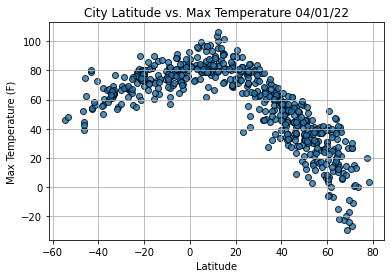

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

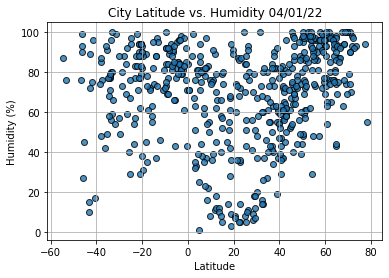

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

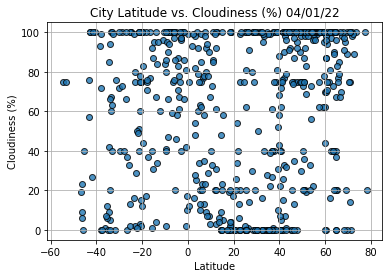

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

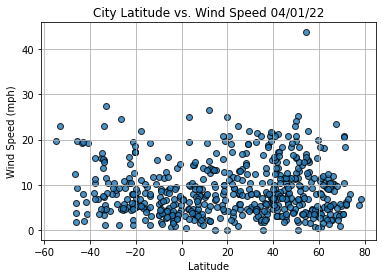

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                 North Platte
Country                        US
Date          2022-04-01 17:32:03
Lat                       41.1239
Lng                     -100.7654
Max Temp                    50.07
Humidity                       37
Cloudiness                      0
Wind Speed                  15.99
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
552     True
553     True
554     True
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leh,IN,2022-04-01 17:31:48,34.1667,77.5833,27.12,46,0,5.37
2,Albany,US,2022-04-01 17:31:52,42.6001,-73.9662,46.02,81,98,3.00
4,Shitkino,RU,2022-04-01 17:31:54,56.3703,98.3543,37.13,86,99,10.63
10,Bethel,US,2022-04-01 17:32:00,41.3712,-73.4140,53.91,72,100,12.66
12,Sao Filipe,CV,2022-04-01 17:32:02,14.8961,-24.4956,71.76,79,23,13.24


In [27]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

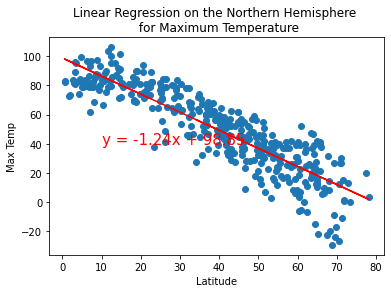

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


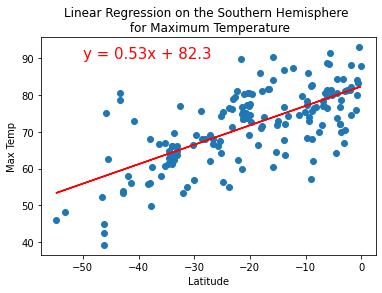

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

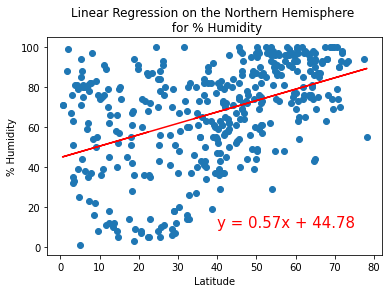

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

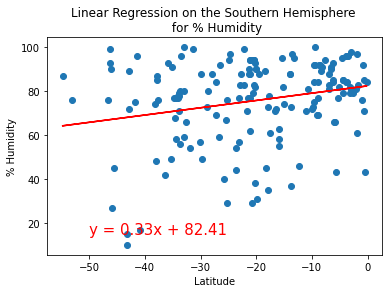

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

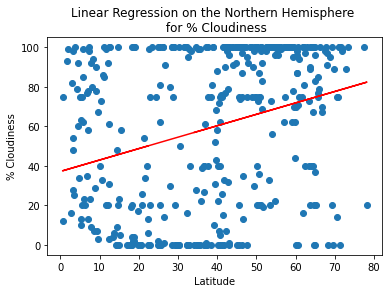

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

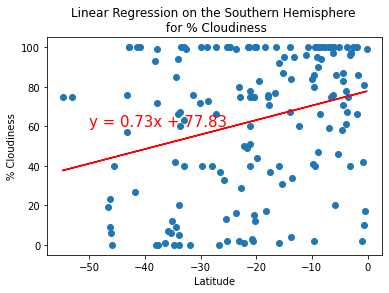

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

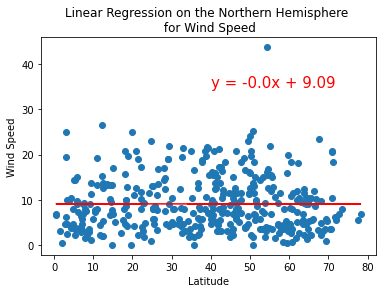

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

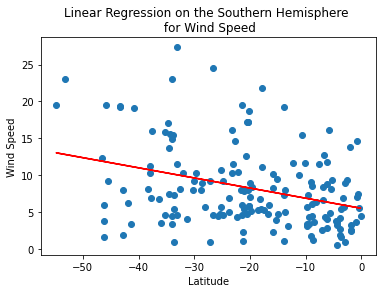

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))